
# `Deep Learning For Pneumonia Detection From Chest X-Ray Data`

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
# import opendatasets
import opendatasets as od 
# specify the dataset url 
dataset_url = "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia"
# download the dataset 
od.download(dataset_url , ".")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: birukabere
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:10<00:00, 243MB/s]


In [ ]:
# Exploring the training dataset 

In [ ]:
import os 
data_dir = "./chest-xray-pneumonia/chest_xray"
print(os.listdir(data_dir))
train_classes = os.listdir(data_dir + "/train")
print(train_classes)

['train', 'chest_xray', 'test', '__MACOSX', 'val']
['NORMAL', 'PNEUMONIA']


In [ ]:
# Exploring the validation dataset 
data_dir = "./chest-xray-pneumonia/chest_xray"
print(os.listdir(data_dir))
validation_classes = os.listdir(data_dir + "/val")
print(validation_classes)

['train', 'chest_xray', 'test', '__MACOSX', 'val']
['NORMAL', 'PNEUMONIA']


In [ ]:
# Exploring the test set 
data_dir = "./chest-xray-pneumonia/chest_xray"
print(os.listdir(data_dir))
test_classes = os.listdir(data_dir + "/test")
print(test_classes)

['train', 'chest_xray', 'test', '__MACOSX', 'val']
['NORMAL', 'PNEUMONIA']


Now let's look a couple of folders one for the training set an another from the test set 

In [ ]:
# Files from the training set 

In [ ]:
import os 
data_dir = "./chest-xray-pneumonia/chest_xray"
Normal_files = os.listdir(data_dir + "/train/NORMAL")
print("Number of training example for the normal files  are : " , len(Normal_files))
# we can print some training examples from the normal files 
print(Normal_files[:5])

Number of training example for the normal files  are :  1341
['NORMAL2-IM-0616-0001.jpeg', 'NORMAL2-IM-1209-0001.jpeg', 'IM-0222-0001.jpeg', 'NORMAL2-IM-1270-0001.jpeg', 'IM-0733-0001.jpeg']


In [ ]:
# Files from the validation set 
import os 
data_dir = "./chest-xray-pneumonia/chest_xray"
Pneumonia_files = os.listdir(data_dir + "/val/PNEUMONIA")
print("Number of validation example for the pneumonia files are = {} ".format(len(Pneumonia_files)))
# we can print some validation examples from the pneumonia files 
print(Pneumonia_files[:5])

Number of validation example for the pneumonia files are = 8 
['person1950_bacteria_4881.jpeg', 'person1951_bacteria_4882.jpeg', 'person1946_bacteria_4875.jpeg', 'person1952_bacteria_4883.jpeg', 'person1954_bacteria_4886.jpeg']


In [ ]:
# Files from the test set 
import os 
data_dir = "./chest-xray-pneumonia/chest_xray"
test_files = os.listdir(data_dir + "/test/PNEUMONIA")
print("Number of testing example from the pneumonia files are = {}".format(len(test_files)))
# we can print some testing examples from the pneumonia files 
print(Pneumonia_files[:5])

Number of testing example from the pneumonia files are = 390
['person1950_bacteria_4881.jpeg', 'person1951_bacteria_4882.jpeg', 'person1946_bacteria_4875.jpeg', 'person1952_bacteria_4883.jpeg', 'person1954_bacteria_4886.jpeg']


In [ ]:
from torchvision.datasets import ImageFolder
data_dir = "./chest-xray-pneumonia/chest_xray/train"
train_dataset= ImageFolder(data_dir)

Label : NORMAL (0)


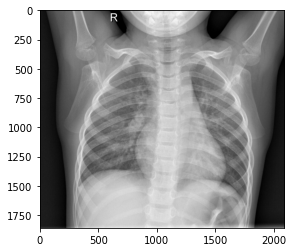

In [ ]:
# Before Converting to PyTorch Tensors , let's look the image 
import matplotlib.pyplot as plt
image , label = train_dataset[0]
def show_one_example(images , labels):
  print("Label :" , train_dataset.classes[labels] , "(" + str(labels) + ")")
  plt.imshow(images)

show_one_example(*train_dataset[0])

Label : NORMAL (0)


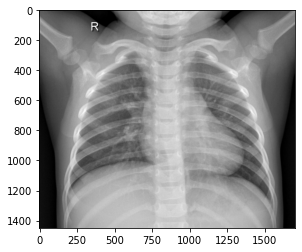

In [ ]:
show_one_example(*train_dataset[100])

Label : NORMAL (0)


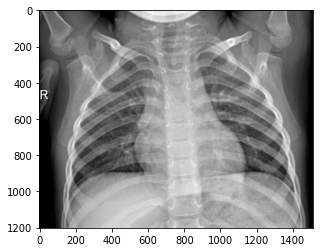

In [ ]:
show_one_example(*train_dataset[150])

In [ ]:
# Add transforms 
from torchvision.transforms import transforms 
train_transform = transforms.Compose([
     transforms.Resize((50 , 50)),
    #transforms.RandomHorizontalFlip(p=0.5),
    #transforms.RandomVerticalFlip(p=0.5),
    #transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    #transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

# the validation transforms
valid_transform = transforms.Compose([
    transforms.Resize((50 , 50)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
data_dir = "./chest-xray-pneumonia/chest_xray/train"
train_dataset = ImageFolder(data_dir , transform = train_transform)
print("The folders inside the train dataset = {}".format(train_dataset))

The folders inside the train dataset = Dataset ImageFolder
    Number of datapoints: 5216
    Root location: ./chest-xray-pneumonia/chest_xray/train
    StandardTransform
Transform: Compose(
               Resize(size=(50, 50), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


In [ ]:
# validation ImageFolder
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms 
data_dir = "./chest-xray-pneumonia/chest_xray/val"
validation_dataset = ImageFolder(data_dir , transform = valid_transform)
print("The folders inside the validation dataset are = {}".format(validation_dataset))

The folders inside the validation dataset are = Dataset ImageFolder
    Number of datapoints: 16
    Root location: ./chest-xray-pneumonia/chest_xray/val
    StandardTransform
Transform: Compose(
               Resize(size=(50, 50), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


In [ ]:
# Testing ImageFolder
from torchvision.datasets import ImageFolder 
from torchvision.transforms import transforms 
data_dir = "./chest-xray-pneumonia/chest_xray/test"
test_dataset = ImageFolder(data_dir , transform = transforms.ToTensor())
print("The folders inside the test set are = {}".format(test_dataset))

The folders inside the test set are = Dataset ImageFolder
    Number of datapoints: 624
    Root location: ./chest-xray-pneumonia/chest_xray/test
    StandardTransform
Transform: ToTensor()


Let's look at a sample element from the training dataset. Each element is a tuple , containing an image tensor and a label , since the data consists a 1858 * 2090 pixel (RGB) , each image tensor has the shape (3 ,1858 , 2090)

In [ ]:
image , labels = train_dataset[0]
print("The shape of the image = {}".format(image.shape))
print("The label of the image is = {}".format(labels))

The shape of the image = torch.Size([3, 50, 50])
The label of the image is = 0


The list of classes is stored in the .classes property of the dataset. The numeric label for each element corresponds to index of the elements label in the list of classes. This means we have 2 labels and the index of that image corressponds to some element from the list of the classes. 


In [ ]:
print(train_dataset.classes)

['NORMAL', 'PNEUMONIA']


In [ ]:
# passing the index will give us the name of the label
print(train_dataset.classes[0])

NORMAL


we can view the image using matplotlib but we need to change the tensor dimensions to (1858, 2090 , 3) because matplotlib has the channel dimension to the end. 


Label : NORMAL (0)


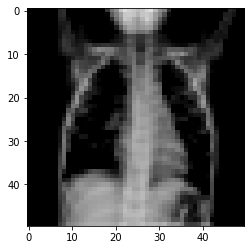

In [ ]:
import matplotlib.pyplot as plt
def show_example(images , labels):
  print("Label :" , train_dataset.classes[labels] , "(" + str(labels) + ")")
  plt.imshow(images.permute(1 , 2 , 0))

show_example(*train_dataset[0])

Label : NORMAL (0)


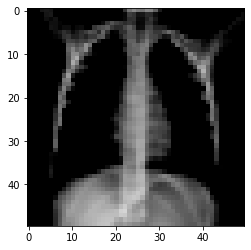

In [ ]:
# displaying another example 
show_example(*train_dataset[230])

In [ ]:
import os 
data_dir = "./chest-xray-pneumonia/chest_xray/train"
for cls in os.listdir(data_dir):
  print(cls , ":" , len(os.listdir(data_dir + "/" + cls)) )

NORMAL : 1341
PNEUMONIA : 3875


This is an important thing to do looking at how many memebers we have from each class so our dataset is a fairly balanced dataset but most of the time we will find , let's say we have 30 different classes and we will find that 80% of the images belongs to 3 or 4 classes , in this situation what we want to do is just exclude some of the classes or we might want to apply some techniques the class imbalanced , techniques like oversampling , where we create multiple copies , images from classes with a few examples , there is also a technique called under sampling , where in a particular epoch we will pick few samples from the larger classes and there is also a technique of giving weights in the loss function to different classes. 

# Class Analyisis 

Found: 1341 elements for NORMAL


<BarContainer object of 2 artists>

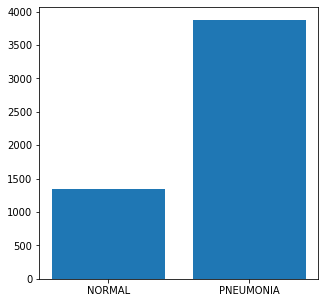

In [ ]:
import os 
data_dir = "./chest-xray-pneumonia/chest_xray/train"
normal_samples = len(os.listdir(data_dir + "/" + "NORMAL"))
pneumonia_samples = len(os.listdir(data_dir + "/" + "PNEUMONIA"))

# create two dictionary 
class_names = {0:'NORMAL' , 1:"PNEUMONIA"}
class_count = {0:normal_samples , 1:pneumonia_samples}

# print results 
print("Found:" , class_count[0] , "elements for " + class_names[0])

# let's plot the bar graph 
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (5 , 5))
plt.bar([class_names[0] , class_names[1]] , [class_count[0] , class_count[1]])

# Class Weighting 

Let's create a tensor of weights of the form 
  
```
# * class_weight = 1 - number_of_samples_of_the_class / total_number_of_samples

```



In [ ]:
import torch 
# class weights value 
samples_0 = class_count[0]
samples_1 = class_count[1]
total_samples = samples_0 + samples_1 

weight_0 = 1 - samples_0 / total_samples 
weight_1 = 1 - weight_0 

# class weights tensor 
class_weights = [weight_0 , weight_1]
class_weights = torch.FloatTensor(class_weights)
print(class_weights)

tensor([0.7429, 0.2571])


# `The Class Imbalance Problem `

What can you do when your model is overfitting your data ? This problem often occurs when we are dealing with an imbalanced dataset. If your dataset represents several classes , one of which is much less represented than the others , then it is difficult to learn the true underlying distribuition representing such minor classes. 

The method of addressing class imbalance that emerged as dominant in almost all analysed scenarios is over-sampling. Oversampling should be applied to the level that completely eliminates the imbalance , whereas the optimal undersampling ratio depends on the extent of imbalance. 

Oversampling is a key strategy to address class imbalance and hance reduce risks of overfitting. 

As opposed to some classical machine learning models , oversampling does not cause overfitting of CNNs. In practice , a class imbalance in a binary problem appears when we have much more observations from one class than others. 

        `Nclass1 >> Nclass2 `
As a result , we have 
        `p(X ∈ class1) >> P(X ∈ class2)`

In other words , it is more likely to draw a pattern from class 1 than from class 2, it is not surprising that it is not capable of learning useful features from such class. 

Now before diving in to the coding , we need to understand a key idea when artificially augumenting the data , what we want is to make sure that by artificially augumenting the minor class , we have `P(X ∈ class1) ≈ P(X ∈ class2)`. 

Suppose for example if we have 90% by 10% probability that means if we have 10 batches of 100 sentences each , we would end up having in average of 10 sentences of class 1 and 90 sentences of class 0. 

If we have balanced batches , as a result , during training time our model will not see significantly more one class over another and risks of overfitting are hence reduced. 

The above directory structure (one folder per class) is used by many computer vision datasets and most DL libraries provide utilities for working with such datasets. The ImageFolder class helps us to easily create PyTorch training and validation datasets without writing custom classes. Then we can use these datasets to create our iteratable data loaders. 

# `Dealing With Class Imbalance Problem Using PyTorch `

# Augmentation for Data Balancing 

In [ ]:
data_dir = "./chest-xray-pneumonia/chest_xray/train"
pneumonia_files = os.listdir(data_dir + "/PNEUMONIA")
normal_files = os.listdir(data_dir + "/NORMAL")
print("The length of the pneumonia files is = {}".format(len(pneumonia_files)))
print("The Length of the normal files is = {}".format(len(normal_files)))

The length of the pneumonia files is = 3875
The Length of the normal files is = 1341


There are 3875 elements of pneumonia and 1341 elements for normal. For the classes to be perfectly balanced , it is possible to proceed in one of the following ways :-  
  * 1) By removing elements from Pneumonia class (Inconvenient , we will waste data )
  * 2) By generating 3875 - 1341 = 2534 images of normal and adding them latter to the training dataset.   

For option 2 , not to result in overfitting , the additional generated images must be different from the original ones , for this to be possible , a unique Augumentation will be applied to each generated image. 

What we know is :-

* `original_dataset = [Normal (1341)  , PNEUMONIA(3875)]`

What we want to achieve is :- 

* `original_dataset = [Normal (1341) , PNEUMONIA(3875)]`
* `dataset_augument_1 = [NORMAL (1341) , PNEUMONIA(3875)]`
* `dataset_augument_2 = [NORMAL (1341) , PNEUMONIA(3875)]`

After which we only consider :- 

* `original_dataset = [Normal (1341) , PNEUMONIA(3875)]::`
* `dataset_augument_1 = [Normal (1341) , _ ]`
* `dataset_augument_2 = [Normal(1193) , _ ]`

So as to obtain :-  
* `final_dataset = [NORMAL (3875) , PNEUMONIA (3875)]`

## Augumentation 

In [ ]:
from torchvision import transforms 
import torchvision.transforms as transform

training_transformations  = {
    "original_data" : transforms.Compose([
        transforms.Resize((256 , 256)),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor()

    ]) , 

    "augumentation_1" : transforms.Compose([
        transforms.Resize((260 , 260)),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(p = 1),
        transforms.ToTensor()


    ]) , 

    "augumentation_2" : transforms.Compose([
        transforms.Resize((250 ,250)),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(p = 0.5),
        transforms.RandomRotation(15),
        transforms.ToTensor()

    ])


}

# Associate the dataset and the transformations with the Image Folder 
from torchvision.datasets import ImageFolder  
data_dir = "./chest-xray-pneumonia/chest_xray/train"

original_data = ImageFolder(root = data_dir , transform = training_transformations["original_data"] )
augumentation_1 = ImageFolder(root = data_dir , transform = training_transformations["augumentation_1"])
augumentation_2 = ImageFolder(root = data_dir , transform = training_transformations["augumentation_2"])

ImageFolder logs all the images in the train folder (both Normal and pneumonia) in Alphabetical order and in class order. Taking Advantage of this , we can use the random_split() function to extract the NORMAL class images from the augumentation_1 and augumentation_2 as mentioned earlier. 

How does random_split work ? 
  * `train , test = random_split(data , [train_size , test_size])`

The function assigns to "train" the first (100 -  test_size * 100) % of the dataset and to test the last (test_size * 100)% of the dataset data. Since in our case , data is in alphabetical and class order , it will be sufficient to compute the right percentage such that only NORMAL images will fall in to the train. 


`Augumentation_1 :- `From Augumentation_1 we want to take all 1349 images of Normal , consequently we have to attribure all others to test this means 
      * `test_size = 3875 / (1341 + 3875)`

`Augumentation_2 :- ` From augmentation_2 , we want to take only 1185 images of normal , this means that we will leave 1341 - 1193 = images of NORMAL to test 
   *    `test_size = 3875 + 148 / (1341 + 3875)` 

In [ ]:
!pip install sklearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Found : 3875 Elements From : NORMAL
Found : 3875 Elements From : PNEUMONIA


<BarContainer object of 2 artists>

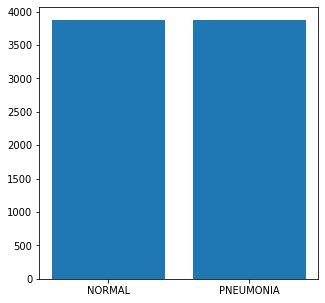

In [ ]:
# Extract images of normal 
from sklearn.model_selection import train_test_split
normal_aug_1 , _ = train_test_split(augumentation_1 , test_size = (3875 / (1341 + 3875)), shuffle = False)

# the second augumentation 
normal_aug_2 , _= train_test_split(augumentation_1 , test_size = (3875 + 148) / (3875 + 1341) , shuffle = False)

# Let's create a concatenated dataset 
from torch.utils.data import ConcatDataset
concat_dataset = ConcatDataset(([original_data , normal_aug_1 , normal_aug_2]))

# Balance Check 
# which {0 : original_data , 1:normal_aug_1 , 2:normal_aug_2}
# what {0:image , 1:label}

from torchvision import datasets 
new_count_normal_train_files = 0 
new_count_pneumonia_train_files = 0 

# pass the original data  

for i in range(len(concat_dataset.datasets[0])):
  label = concat_dataset.datasets[0][i][1]

  if (label==0):
    new_count_normal_train_files += 1
  elif(label == 1):
    new_count_pneumonia_train_files += 1

# pass for the augument_1 data

for i in range(len(concat_dataset.datasets[1])):
  label = concat_dataset.datasets[1][i][1]

  if(label == 0):
    new_count_normal_train_files += 1

  elif (label == 1):
    new_count_pneumonia_train_files += 1

# pass for the augument_2 data 

for i in range(len(concat_dataset.datasets[2])):
  label = concat_dataset.datasets[2][i][1]

  if(label == 0):
    new_count_normal_train_files += 1
  elif (label == 1):
    new_count_pneumonia_train_files += 1

class_names = {0:'NORMAL' , 1:"PNEUMONIA"}
print("Found :" , new_count_normal_train_files , "Elements From :" , class_names[0])
print("Found :" , new_count_pneumonia_train_files , "Elements From :" , class_names[1])

# let's plot the bar graph 
import matplotlib.pyplot as plt 
fig = plt.subplots(figsize = (5 , 5))
plt.bar([class_names[0] , class_names[1]] , [new_count_normal_train_files , new_count_pneumonia_train_files])

# Let's Do The Same Thing For The Validation

8 8
Found: 8 elements for NORMAL


<BarContainer object of 2 artists>

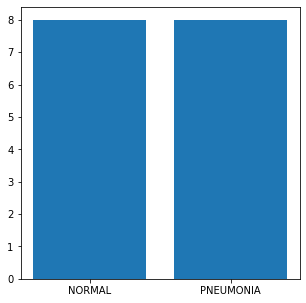

In [ ]:
import os 
data_dir = "./chest-xray-pneumonia/chest_xray/val"
normal_samples = len(os.listdir(data_dir + "/" + "NORMAL"))
pneumonia_samples = len(os.listdir(data_dir + "/" + "PNEUMONIA"))
# the length of the normal and pneumonia samples
print(normal_samples , pneumonia_samples)
# create two dictionary 
class_names = {0:'NORMAL' , 1:"PNEUMONIA"}
class_count = {0:normal_samples , 1:pneumonia_samples}

# print results 
print("Found:" , class_count[0] , "elements for " + class_names[0])

# let's plot the bar graph 
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (5 , 5))
plt.bar([class_names[0] , class_names[1]] , [class_count[0] , class_count[1]])

# Training and Validation datasets 

While building real world machine learning models , it is quite common to split the dataset in to three parts .

# Training set :- 
used to train the model that is compute the loss and adjust the weights of the model using gradient descent. 

# Validation set :- 
Used to evaluate the model while training , ajust hyper parameters(learning rate ) and pick the best version of the model 

# Test Set :- 
Used to compare different models or different types of modeling approaches and report the final accuracy of the model. 

# Loading The Data 

In [ ]:
import torch 
from torch.utils.data.sampler import SubsetRandomSampler
batch_size = 50
# Training loader and Train indices 
train_loader = torch.utils.data.DataLoader(train_dataset , batch_size = batch_size , shuffle = True , num_workers = 0 , pin_memory = True )
# Validation loader 
validation_loader =  torch.utils.data.DataLoader(validation_dataset , batch_size = batch_size , shuffle = True , num_workers = 0 , pin_memory = True )
print("The length of the train loader = {}".format(len(train_loader)))
print("The length of the validation loader = {}".format(len(validation_loader)))


The length of the train loader = 105
The length of the validation loader = 1


# `PyTorch from torchvision.utils import make_grid`

The torchvision.utils package us with th make_grid() function to create a grid of images. The images should be torch tensors. It accepts 4D mini  - batch tensor of shape (B * C * H * W ) or a list of tensor images , allof the same size. The output of this function is a torch tensor containing a grid of images. We can specify the number of images in a row using the nrow parameter. 

Syntax :- `torch.utils.make_grid(tensor = image , nrow = number_of_rows)`

plt.subplot(figsize = (rows . columns))

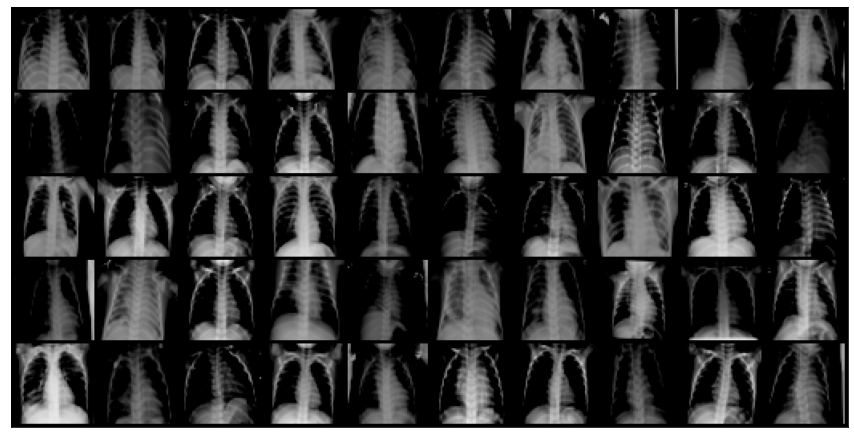

In [ ]:
# we can look at the batches from the dataset using the make grid method from torchvision
from torchvision.utils import make_grid
import  matplotlib.pyplot as plt
def show_batch(data_loader):
  for images,labels in data_loader:
    fig , ax = plt.subplots(figsize = (15 , 15))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(tensor = images , nrow= 10).permute(1 , 2 ,  0 ))
    break
    
show_batch(data_loader =train_loader )

# `Access To The GPU `

In [ ]:
import torch 
# Get the default device 
def get_default_device():
  """ Pick GPU if available , else CPU """
  if torch.cuda.is_available():
    return torch.device("cuda")
  else:
    return torch.device("cpu")

# moving to device 
def to_device(data , device):
  """ Move Tensors to chosen device """
  if isinstance(data , (list , tuple)):
    return [to_device(x , device) for x in data]
  return data.to(device , non_blocking = True)

# Wrapping the data loader 
class DeviceDataLoader():
  """ Wrap a data loader to move data to a device"""
  def __init__(self , dl , device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    """ Yield a batch of data after moving it to device """ 
    for images , labels in self.dl:
      yield to_device(images , self.device)
      yield to_device(labels , self.device)

  def __len__(self):
    """ Number Of Batches """
    return len(self.dl)

my_device =  get_default_device()
train_dl = DeviceDataLoader(dl = train_loader , device = my_device)
valid_dl = DeviceDataLoader(dl = validation_loader , device = my_device)

In [ ]:
print(torch.cuda.is_available()) # printinga boolean value , checking if GPU exists 
image , label = train_dataset[0] 
img_device = to_device(data = image , device = my_device)
print("The device of this image is in = {}".format(img_device.device))

print("The device of the training loader is = {}".format(train_dl.device))
print("The device of the validation loader is = {}".format(valid_dl.device))

False
The device of this image is in = cpu
The device of the training loader is = cpu
The device of the validation loader is = cpu


# Defining The Model (Convolutional Neural Network)

Before we define the model , let's look at how a single convolutional layer followed by a max-pooling layer operates on the data. 

In [ ]:
import torch 
import torchvision 
simple_model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels = 3 , out_channels = 8 , kernel_size = (5 , 5) , padding = (1 , 1)),
    torch.nn.MaxPool2d(2 , 2)


)

# let's create a fake dataset 
x = torch.rand(64 , 3 , 32 , 32)
print(simple_model(x).shape)

torch.Size([64, 8, 15, 15])


In [ ]:
# we can actually print out one batch from the train model 
for images , labels in train_loader:
  print("Image shape :" , images.shape)
  print("Shape of the label:" , labels.shape)
  out  = simple_model(images)
  print("Output shape {}".format(out.shape))
  break

Image shape : torch.Size([50, 3, 50, 50])
Shape of the label: torch.Size([50])
Output shape torch.Size([50, 8, 24, 24])


In [ ]:
import torch 
def conv_block(in_channels, out_channels, pool=False):
    layers = [torch.nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              torch.nn.BatchNorm2d(out_channels), 
              torch.nn.ReLU(inplace=True)]
    if pool: layers.append(torch.nn.MaxPool2d(2))
    return torch.nn.Sequential(*layers)

# Let's create this big model 
class Complex_Model(torch.nn.Module):
  def __init__(self , input_channels , number_of_classes):
    # call the parent constructor 
    super(Complex_Model , self).__init__()
    # Input_size = 100 * 3 * 32 * 32 
    self.conv1 = conv_block(input_channels, 64) # 100 * 64 * 32 * 32 
    self.conv2 = conv_block(64, 128, pool=True) # 100 * 128 * 16 *16
    
    self.conv3 = conv_block(128, 256, pool=True) # 100 * 256 * 8 * 8
    self.conv4 = conv_block(256, 512, pool=True) # 100 * 512 * 4 * 4

    self.classifier = torch.nn.Sequential(torch.nn.AdaptiveMaxPool2d(1), # 100 x 512 x 1 x 1 
                                        torch.nn.Flatten(), # 100 * 512
                                        torch.nn.Dropout(0.2),
                                        torch.nn.Linear(512, number_of_classes) ,
                                        torch.nn.Sigmoid())
  
  def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.classifier(out)
        return out
    
# Let'sgenerate a fake dataset and pass to it 
input_channels = 3
model = Complex_Model(input_channels = input_channels , number_of_classes = 2 )
# The fake dataset 
import torch 
x = torch.rand(100 , 3  , 32 , 32)
print(model(x).shape)

torch.Size([100, 2])


Let's verify that the model produces the expected output on a batch of raining data. The 10 outputs for each image can be interpreted as probabilities for the 10 target class (after applying softmax) and the class with the highest probability is chosenas the label predicte by the model for the inputs image.  

In [ ]:
# Moving the model to GPU 
model = to_device(model , device = my_device)
# Check the model is on GPU 
# print(model.device) # we can't do this
# But we can check using like this 
model.conv1[0].weight.device

device(type='cpu')

Here if it says Cuda out of memory , this means we used large amount of batch size or large amount of image size or batch size , so play with those to get rid of these errors 

There will be a problem as we can't multiply like mat1 and mat2 can not be multiplied , when this case happened go and refine each of your dimensions or use AdaptiveMaxPool2d(1)

All the pre-trained model has AdaptiveMaxPool2d(1) , they can work with images of any size. 


In [ ]:
for images , targets in train_loader:
  print("The shapes of the image :" , images.shape)
  # Moving images and targets to GPU 
  images = to_device(images , device = my_device)
  targets = to_device(targets , device = my_device)
  predictions = model(images)
  print("The output shape :" , predictions.shape)
  print("out[0]" , predictions[0])
  print("The real target :" , targets[0])
  # if we add all the predictions for one dataset it will be one 
  print("The sum is " , torch.sum(predictions[0]))
  # we can see the element with a largest probability 
  print("The largest probability is " , torch.max(predictions[0]))
  # we can see the index with a largest probability 
  print("The index of the largest probability is " , torch.argmax(predictions[0]))
  break


The shapes of the image : torch.Size([50, 3, 50, 50])
The output shape : torch.Size([50, 2])
out[0] tensor([0.8408, 0.2679], grad_fn=<SelectBackward0>)
The real target : tensor(0)
The sum is  tensor(1.1087, grad_fn=<SumBackward0>)
The largest probability is  tensor(0.8408, grad_fn=<MaxBackward1>)
The index of the largest probability is  tensor(0)


# Training The Model 

In [ ]:
import torch 
import copy 
def training_step(model , loader , loss_function , optimizer):
  # set the training mode 
  model.train()
  # For every epoch initialize loss and number of correct predictions 
  epoch_loss = 0
  epoch_correct = 0
  # ------------------ Batch-Loop ------------------------------------ #
  for images , labels in iter(loader):                                 #
    # Load images and labels to device                                 #
    images = to_device(images , device = my_device)                    #        
    labels = to_device(labels , device = my_device)                    #
                                                                       #
    # Initialize the gradient                                          #
    optimizer.zero_grad()                                              #
    # ------------------Training  ---------------------------#         #
    with torch.set_grad_enabled(True):
      # output from the model (from the forward pass)
      output = model(images)
      # calculate the loss function for the current batch 
      loss = loss_function(output , labels)
      # perform the backpropagation 
      loss.backward()
      # Gradient descent step to update parameters 
      optimizer.step()
      # Extract the maximum from the predictions
      _ , predictions = torch.max(output , dim =1 )
    

    # Updating the loss * number of images in the batch
    # item() returns the value of the tensor as a standard number
    epoch_loss += loss.item()*images.size(0)
    # counting the number of correct predictions
    epoch_correct += torch.sum(predictions == labels)

  
  # Get the right epoch loss (element loss / number_element )
  training_loss = epoch_loss / len(loader.dataset)
  # Accuracy of the current batch (correct / n_samples)
  training_accuracy = epoch_correct.double() / len(loader.dataset ) 
  # classification accuracy is the ratio of correct predictions to total predictions made , It is often presented as a percentage multiplying 
  # the result by 100 
  return training_loss , training_accuracy 



# ----------------------     Evaluation Step -----------------------------------
def evaluate_model(model , loader , loss_function , optimizer):
  # set the evaluation mode 
  model.eval()
  # For every epoch initialize loss and number of correct predictions
  epoch_loss = 0
  epoch_correct = 0

  # --------------------------- Batch Loop -------------------------------------
  for images , labels in iter(loader):
    # Load images and labels to device
    images = to_device(images , device = my_device)
    labels = to_device(labels , device = my_device)

    # ------------------------- Evaluation -------------------
    with torch.set_grad_enabled(False):
      # output from the model (from the forward pass) 
      output = model(images)

      # calculate the loss functions for the current batch 
      loss = loss_function(output , labels )
      # Extract a prediction 
      _ , predictions = torch.max(output , dim = 1)

    # update the loss (loss * num images in the batch)
    epoch_loss += loss.item() * images.size(0)
    # update the correct 
    epoch_correct += torch.sum(predictions == labels)

  # Get the right epoch loss (element loss / n element )
  validation_loss = epoch_loss / len(loader.dataset)
  # Accuracy of the current batch (correct / n_samples)
  validation_accuracy = epoch_correct.double() / len(loader.dataset)

  return validation_loss , validation_accuracy



# Start Training 
print("=======================================================")
# Number of epochs 
epochs = 15
best_val_loss = float('inf') # Monitor the validation loss
# float('inf') is used to set a variable with an infinitly large value
# For the records 
train_loss_savings = []
train_acc_savings  = []
val_loss_savings  = []
val_acc_savings = []


# Saving the model 
best_model = copy.deepcopy(model.state_dict())
# ===============================================
#            Hyper - parameters
# ===============================================
import torch 
loss_function = torch.nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters() , learning_rate)


#================================================
#            Training 
#================================================

for epoch in range(epochs):
  # Training step 
  train_loss , train_acc = training_step(model , train_loader , loss_function , optimizer)
  train_loss_savings.append(train_loss)
  train_acc_savings.append(train_acc.item())

  # Evaluation step
  val_loss , val_acc = evaluate_model(model , validation_loader , loss_function , optimizer)
  val_loss_savings.append(val_loss)
  val_acc_savings.append(val_acc.item())

  # Print results
  print(f'Epoch: {epoch+1:02}/{epochs} - train_loss: {train_loss:.4f} - train_accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}')
  # if the val loss improved , save the model 
  if val_loss < best_val_loss:
    print(f'Epoch: {epoch+1:02}/{epochs} - val_loss improved from {best_val_loss:.4f} to {val_loss:.4f}, new model saved')
    best_val_loss = val_loss
    best_model = copy.deepcopy(model.state_dict())
  else:
    print(f'Epoch: {epoch+1:02}/{epochs} - val_loss did not improve')


Epoch: 01/15 - train_loss: 0.4152 - train_accuracy: 0.8924 - val_loss: 0.6791 - val_accuracy: 0.5625
Epoch: 01/15 - val_loss improved from inf to 0.6791, new model saved
Epoch: 02/15 - train_loss: 0.3526 - train_accuracy: 0.9622 - val_loss: 0.6534 - val_accuracy: 0.6250
Epoch: 02/15 - val_loss improved from 0.6791 to 0.6534, new model saved
Epoch: 03/15 - train_loss: 0.3417 - train_accuracy: 0.9726 - val_loss: 0.7457 - val_accuracy: 0.5625
Epoch: 03/15 - val_loss did not improve
Epoch: 04/15 - train_loss: 0.3356 - train_accuracy: 0.9789 - val_loss: 0.6975 - val_accuracy: 0.5625
Epoch: 04/15 - val_loss did not improve
Epoch: 05/15 - train_loss: 0.3351 - train_accuracy: 0.9776 - val_loss: 0.5805 - val_accuracy: 0.7500
Epoch: 05/15 - val_loss improved from 0.6534 to 0.5805, new model saved
Epoch: 06/15 - train_loss: 0.3299 - train_accuracy: 0.9839 - val_loss: 0.4839 - val_accuracy: 0.8125
Epoch: 06/15 - val_loss improved from 0.5805 to 0.4839, new model saved
Epoch: 07/15 - train_loss: 0.

# Plotting The Trends 

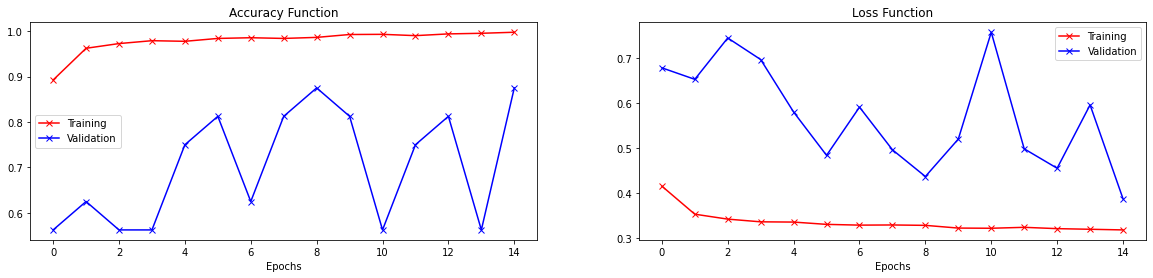

In [ ]:
# plotting the training accuracy and the validation accuracy 
def plot():
  import matplotlib.pyplot as plt
  plt.figure(figsize = (20 , 4))

  # Accuracy Function 
  plt.subplot(1 , 2 , 1)
  plt.plot(train_acc_savings , "-rx")
  plt.plot(val_acc_savings , "-bx")
  plt.xlabel("Epochs")
  plt.legend(["Training" , "Validation"])
  plt.title("Accuracy Function")

  # Loss Function 
  plt.subplot(1 , 2 , 2)
  plt.plot(train_loss_savings , "-rx")
  plt.plot(val_loss_savings , "-bx")
  plt.xlabel("Epochs")
  plt.legend(["Training" , "Validation"])
  plt.title("Loss Function")

# Calling the function 
plot()

In [ ]:
# Train it for some more time 
epochs = 5
for epoch in range(epochs):
  # Training step 
  train_loss , train_acc = training_step(model , train_loader , loss_function , optimizer)
  train_loss_savings.append(train_loss)
  train_acc_savings.append(train_acc.item())

  # Evaluation step
  val_loss , val_acc = evaluate_model(model , validation_loader , loss_function , optimizer)
  val_loss_savings.append(val_loss)
  val_acc_savings.append(val_acc.item())

  # Print results
  print(f'Epoch: {epoch+1:02}/{epochs} - train_loss: {train_loss:.4f} - train_accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}')
  # if the val loss improved , save the model 
  if val_loss < best_val_loss:
    print(f'Epoch: {epoch+1:02}/{epochs} - val_loss improved from {best_val_loss:.4f} to {val_loss:.4f}, new model saved')
    best_val_loss = val_loss
    best_model = copy.deepcopy(model.state_dict())
  else:
    print(f'Epoch: {epoch+1:02}/{epochs} - val_loss did not improve')

Epoch: 01/5 - train_loss: 0.3184 - train_accuracy: 0.9954 - val_loss: 0.6069 - val_accuracy: 0.6250
Epoch: 01/5 - val_loss did not improve
Epoch: 02/5 - train_loss: 0.3163 - train_accuracy: 0.9979 - val_loss: 0.3332 - val_accuracy: 1.0000
Epoch: 02/5 - val_loss improved from 0.3871 to 0.3332, new model saved
Epoch: 03/5 - train_loss: 0.3167 - train_accuracy: 0.9971 - val_loss: 0.3624 - val_accuracy: 0.9375
Epoch: 03/5 - val_loss did not improve
Epoch: 04/5 - train_loss: 0.3177 - train_accuracy: 0.9956 - val_loss: 0.4875 - val_accuracy: 0.7500
Epoch: 04/5 - val_loss did not improve
Epoch: 05/5 - train_loss: 0.3155 - train_accuracy: 0.9987 - val_loss: 0.3265 - val_accuracy: 1.0000
Epoch: 05/5 - val_loss improved from 0.3332 to 0.3265, new model saved


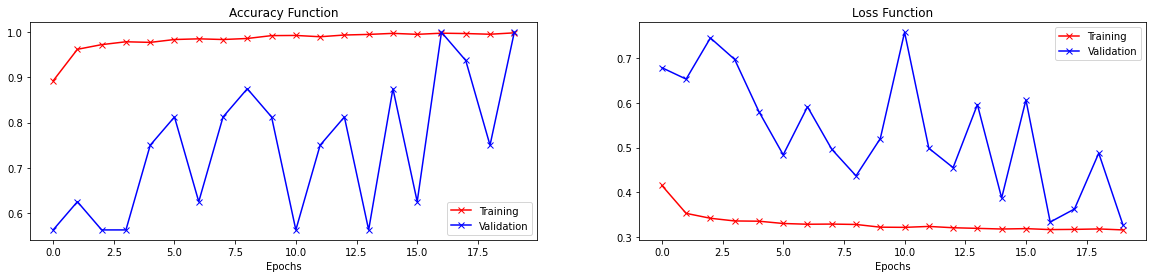

In [ ]:
# Calling the plot function again 
plot()

# Saving The Model 

In [ ]:
# path for saving the best model
path_best_model = "./chest-xray-pneumonia/chest_xray/"
# save the model 
torch.save(model.state_dict() , path_best_model + "best-model-weighted.pt")

# Prediction On The Test Dataset 

### Testing With Indiviual Images 

While we have been tracking the overall accuracy of the mode so far . It is also a good idea to look at the model's results on some sample images. Let's test our model with some images from the pre-trained test data. We begin by creating a test dataset using the ImageFolder class> 

The contents in the data dir are  ['NORMAL', 'PNEUMONIA']
NORMAL : 234
PNEUMONIA : 390
Label :  NORMAL (0) Predicted image  PNEUMONIA
AxesImage(54,36;334.8x217.44)


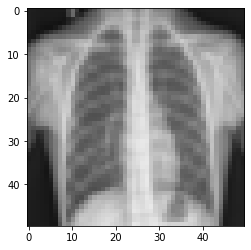

In [ ]:
import torch 
import os
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms 
data_dir = "./chest-xray-pneumonia/chest_xray/test"
print("The contents in the data dir are " , os.listdir(data_dir))
for cls in os.listdir(data_dir):
  print(cls , ":" , len(os.listdir(data_dir + "/" + cls)))

test_transform = transforms.Compose([
     transforms.Resize((50 , 50)),
    #transforms.RandomHorizontalFlip(p=0.5),
    #transforms.RandomVerticalFlip(p=0.5),
    #transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    #transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
   
])
test_dataset = ImageFolder(root = data_dir , transform = test_transform)


# Let's define a helper function predict_image , which it returns label for a single image tensor 
def predict_image(img , model):
  # convert to batch of 1 , because the image is now C*H*W but our model expects N*C*H*W
    xb = img.unsqueeze(0)
    # let's move it to the GPU 
    test_img = to_device(data = xb , device = my_device)
    # Get a prediction from the model 
    predictions = model(test_img)
    # pick the index with the highest probability 
    _ , scores = torch.max(predictions , dim = 1) # but i guess his must be argmax to return the index
    # retrieve the class label
    return test_dataset.classes[scores[0].item()]


  # plotting 
import matplotlib.pyplot as plt 
def show_example(image , label):
  print("Label : " , test_dataset.classes[label] , "(" + str(label) + ")" , "Predicted image " , predict_image(image , model))
  print(plt.imshow(image.permute(1 , 2 , 0)))

show_example(*test_dataset[0])


Label :  NORMAL (0) Predicted image  PNEUMONIA
AxesImage(54,36;334.8x217.44)


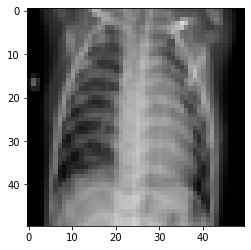

In [ ]:
# try another examples 
show_example(*test_dataset[200])

Label :  NORMAL (0) Predicted image  PNEUMONIA
AxesImage(54,36;334.8x217.44)


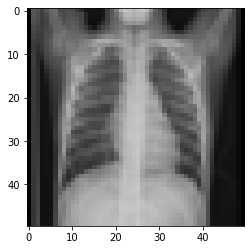

In [ ]:
# try another example 
show_example(*test_dataset[100])

In [ ]:
# The number of elements in the tensor can be calculated using a.size()
import torch 
torch_tensor = torch.tensor([1 , 2 , 3 , 4])
print("The number of elements in the tensor is = {}".format(torch_tensor.size()))
# what is the difference with numel()
print("The number of elements in the tensor is = {}".format(torch.numel(torch_tensor)))

# the size method is  also the same as the shape method 
tensor = torch.tensor([[1 , 2 ,  3 , 4] , [5 , 6 , 7 , 8]])
print(tensor.size())
print(tensor.shape)

The number of elements in the tensor is = torch.Size([4])
The number of elements in the tensor is = 4
torch.Size([2, 4])
torch.Size([2, 4])


# Accuracy On Test

No epochs on the test set

In [ ]:
# Load the best version of the model 
from torchvision.transforms import transforms 
model.load_state_dict(torch.load(path_best_model + 'best-model-weighted.pt') )

# transform the test dataset 
test_transform = transforms.Compose([
    transforms.Resize((256 , 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

# Image Folder 
data_dir = "./chest-xray-pneumonia/chest_xray/test"
test_data = ImageFolder(root = data_dir , transform = test_transform)

# batch size 
batch_size = 100 
test_loader = torch.utils.data.DataLoader(test_data , batch_size = batch_size , shuffle = True)

# define the function 
def get_probs_and_preds(model , loader):
  # set the evaluation mode 
  model.eval()
  images_savings = []
  labels_savings = []
  probs_savings  = []
  preds_savings  = []

  for images , labels in iter(loader):
    images = to_device(images , device = my_device)
    lables = to_device(labels , device = my_device)
    
    with torch.set_grad_enabled(False):
      output = model(images)
      # output = F.softmax(output)
      probabilities , predictions = torch.max(output , dim = 1)

    images_savings.append(images.cpu())
    labels_savings += labels.tolist() # converts a pytorch tensor to a pytorch list 
    probs_savings  += probabilities.tolist()
    preds_savings  += predictions.tolist()

  # Accuracy 
  correct_samples = 0
  for i in range(len(labels_savings)):
    if labels_savings[i] == preds_savings[i]:
      correct_samples += 1
  accuracy = correct_samples / len(labels_savings)
  return images_savings , labels_savings , probs_savings , preds_savings , accuracy

# Evaluate the model on test data 

images , labels , probs , preds , accuracy = get_probs_and_preds(model , test_loader)
# print result 
print("Accuracy on the test dataset = {}".format(accuracy))

Accuracy on the test dataset = 0.6362179487179487


# Visualizing The Results 

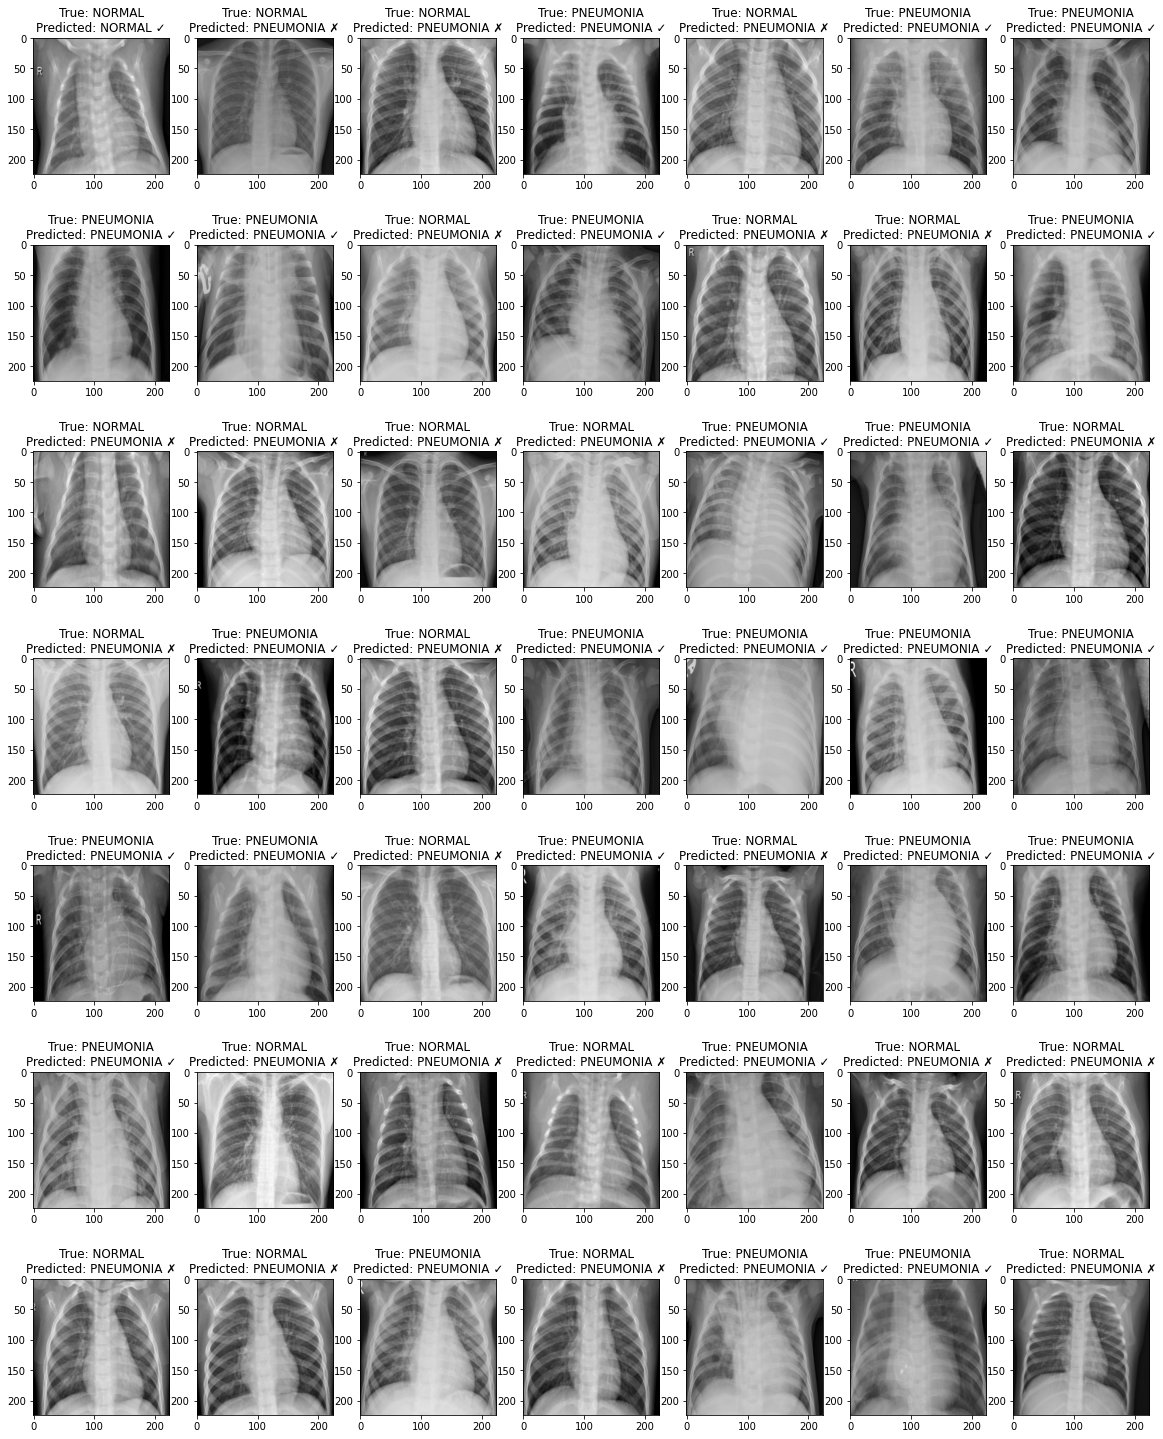

In [ ]:
## Visualize some images with: true label, predicted label, probability
import numpy as np 
plt.figure(figsize=(20, 26))
n_rows = 7
n_cols = 7

# Display images
for i in range(n_rows*n_cols):
  text_true = 'True: ' + test_data.classes[labels[i]]
  text_pred = '\nPredicted: ' + test_data.classes[preds[i]]

  if labels[i] == preds[i]:
      text_correct = ' ✓'
  else:
      text_correct = ' ✗'

  # Plot the image
  plt.subplot(n_rows, n_cols, i+1)
  plt.imshow(images[0][i].permute(1, 2, 0))
  plt.title(text_true + text_pred + text_correct)

# `Confusion Matrix `

A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if you have unequal number of observations in each class or if you have more than two classes in your dataset. Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what type of error it is making. 

`Classification Accuracy and It's Limitations ` :-  Classification Accuracy is the ratio of correct predictions to the total predictions made , It is often presented as a percentage multiplying the result by 100. 

Classification Accuracy can also easily be turned in to a mis-classification rate or error rate by inverting the value such as 
* Error_rate = (1 - (correct_predictions / total_prediction)) * 100

Classification accuracy is a great place to start but often encounters problems in practice. The main problem with classification Accuracy is that it hides the detail you need to better understand the performance of your classification model. But thankfully we can tease apart this detail by a confusion matrix. 

`What is Confusion Matrix` :- Is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. 

The confusion matrix shows the ways in which your classification model is confused when it makes a prediction. It gives you insight not only in the errors being made but more importantly the type of errors that are being made. 

`How to Calculate a Confusion Matrix :- ` Below is the process of calculating a confusion matrix :-  

1) You need a test dataset or a validation dataset with expected outcome values 
2) Make a prediction for each row in your test dataset
3) From the expected outcomes and predictions count  

     * The number of correct predictions for each class 
     * The number of incorrect predictions for each class

These numbers are then organized in to a table or a matrix as follows
   *  `Expected Down the side` :-  Each row of the matrix corresponds to a predicted class 
   * `Predicted Across the top` :-  Each column of the matrix corresponds to an actual class  


The counts of correct and incorrect classification are then filled in to the table. The matrix can be used for 2-class problems where it is very easy to understand but can easily be applied to problems with 3 or more class values , by adding more rows and columns to the confusion matrix. 


`Example :- ` Let's pretend we have a two class classification problem of predicting whether a photgraph contains a man or a woman. we have a test dataset of 10 records with expected outcomes and a set of predictions from our classification algorithm. 


Let's start off and calculate the classification accuracy for this set of predictions. The algorithm made of the 10 predictions correct with an accuracy of 70%. 



```
# Accuracy = (total_correct_predictions / total_prediction_made) * 100
accuracy  = ( 7/10 ) * 100
```
`But what type of errors were made ? `

Let's turn our results in to a confusion matrix , first we must calculate the number of correct predictions for each class.


```
men classified as me :-  3
women classified as women :-  4

```
Now we can calculate the number of in correct predictions for each class , organized by the predicted value. 

```
Men classified as women :- 2
Women classified as men :-  1
```

We can now arrange these values in to 2-class confusion matrix. 


```
      | Men  |  Women 
Men   |  3   |    1
      |--------------
Women |  2   |    4

```
We can learn a lot from this table :-   

* The total actual men in the dataset is the sum of the values on the men column (3+2)
* The total actual women in the dataset is the sum of the values in the women column (1+4)
* The correct values are organized in a diagonal line from top-left to bottom-right of the matrix (3+4)
* More errors were made by predicting men as women then predicting women as men

# Two Class Problems are Special 
In two class problem , we are often looking to discrimintate between observations with a specific outcome , from normal observations. 

* True Positive :- For correctly predicted event values 
* False Positve :- For incorrectly predicted the event values 
* True Negative :- For incorrectly predicted no event values 
* False Negative :- For incorrectly predicted no event values

We can summarize this in the confusion matrix as follows 

```

            Event          No Event 

Event     True Positive    False Positive

No-Event  False Negative   True Negative 


```
This can help in calculating more advanced classification metrics such as precision , recall , specificity and sensitivity of our classifier. 


In [ ]:
import torch
from sklearn.metrics import confusion_matrix
target = torch.tensor([1 , 1 , 0 , 0])
predictions  = torch.tensor([0 , 1 , 0 , 0])
confmat = confusion_matrix(predictions , target)
print(confmat)

[[2 1]
 [0 1]]


# How Heatmap Works :-   
Heatmaps visualize the data in a 2-dimensional format in the form of colored maps. The color maps use hue , saturation or luminance to achieve color variation to display various details. Heat maps is about replacing numbers with colors because the human brain understands visuals better than numbers , text or any written data. Human beings are visual learners therefore , visualizing the data in any form makes more sense.  

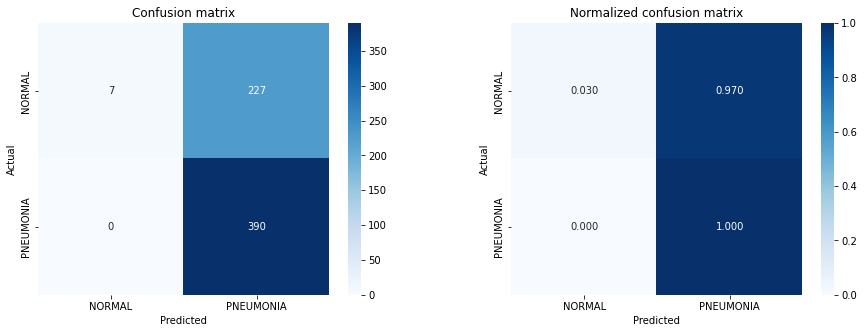

In [ ]:
import seaborn as sns
# Build the confusion matrix
cm = confusion_matrix(labels, preds)

# Normalize the confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Ticklables
ticklabels = test_data.classes

# Plot
fig, ax = plt.subplots(figsize=(15,5))

# Confusion matrix
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='.3g', xticklabels=ticklabels, yticklabels=ticklabels, cmap=plt.cm.Blues);
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

# Normalized confusion matrix
plt.subplot(1,2,2)
sns.heatmap(cmn, annot=True, fmt='.3f', xticklabels=ticklabels, yticklabels=ticklabels, cmap=plt.cm.Blues);
plt.title('Normalized confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.subplots_adjust(wspace=.3)